In [1]:
!pip install -q --upgrade pandas
import pandas as pd

#projects1_1 = pd.read_csv('kickstarter-projects/ks-projects-201612.csv', encoding='latin1')
projects1 = pd.read_csv('kickstarter-projects/ks-projects-201801.csv')
projects2 = pd.read_csv('funding-successful-projects-on-kickstarter/train.csv')

In [2]:
pd.__version__

'0.22.0'

In [3]:
projects = projects1.merge(projects2, on='name', how='inner')
projects = projects.dropna()
projects.columns

Index(['ID', 'name', 'category', 'main_category', 'currency_x', 'deadline_x',
       'goal_x', 'launched', 'pledged', 'state', 'backers', 'country_x',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'project_id',
       'desc', 'goal_y', 'keywords', 'disable_communication', 'country_y',
       'currency_y', 'deadline_y', 'state_changed_at', 'created_at',
       'launched_at', 'backers_count', 'final_status'],
      dtype='object')

In [4]:
import numpy as np

renames = {
    'country_x': 'country',
    'currency_x': 'currency',
    'usd_goal_real': 'goal',
    'usd_pledged_real': 'pledged',
    'country_y': 'country',
    'currency_y': 'currency',
    'deadline_y': 'deadline',
    'backers_count': 'backers'
}

to_num = lambda x: pd.to_numeric(x, errors='coerce')
to_date = lambda x: pd.to_datetime(x, unit='s')
conversions = {
    'backers': to_num,
    'deadline': to_date,
    'launched_at': to_date,
    'state_changed_at': to_date,
    'created_at': to_date,
    'goal': to_num,
    'pledged': to_num,
}

drops = (
    'ID', 'project_id', 'keywords', 'deadline_x', 
    'launched', 'disable_communication', 
    'goal_x', 'goal_y', 'usd pledged'
)

In [5]:
def clean_df(df, renames=None, retypes=None, drops=None):
    if renames is not None:
        for orig, new in renames.items():
            if new in df.columns:
                diffs = df[[orig, new]][df[orig] != df[new]]
                print("The following columns showed differences when renaming!")
                print(diffs[:10])
                df[new] = df[orig]
                df = df.drop(orig, axis=1)
            else:
                df = df.rename(columns={orig: new})
    if retypes is not None:
        for col, conv in retypes.items():
            dfcol = df[col]
            df = df.drop(col, axis=1)
            df[col] = conv(dfcol)
    if drops is not None:
        for col in drops:
            df = df.drop(col, axis=1)
            
    df = df.dropna(axis=1, how='all')
    df = df.dropna(axis=0, how='any')
    return df
            
cleaned = clean_df(projects, renames, conversions, drops)   
cleaned

The following columns showed differences when renaming!
    usd_pledged_real  pledged
4               6.29     48.0
5           42174.03  48905.0
6              31.09     21.0
25              2.36      3.0
29           9110.34  11336.0
40           1122.89    756.0
44            485.72    293.0
47             16.58     10.0
49            628.47    656.0
57           4848.23   3097.0
The following columns showed differences when renaming!
    country_y country
109        US      GB
128        US      GB
345        US      CA
347        US      GB
398        US      GB
399        US      GB
416        CA      US
432        US      CA
863        US      AU
896        GB      US
The following columns showed differences when renaming!
    currency_y currency
109        USD      GBP
128        USD      GBP
345        USD      CAD
347        USD      GBP
398        USD      GBP
399        USD      GBP
416        CAD      USD
432        USD      CAD
863        USD      AUD
896        GBP      

,name,category,main_category,currency,state,country,desc,final_status,backers,deadline,launched_at,state_changed_at,created_at,goal,pledged
0,Where is Hank?,Narrative Film,Film & Video,USD,failed,US,"Abandoned Property. Sounds of struggle, muffle...",0,3,2013-02-25 23:20:50,2013-01-11 23:20:50,2013-02-25 23:20:50,2013-01-08 00:01:24,45000.00,220.00
1,Of Jesus and Madmen,Nonfiction,Publishing,CAD,failed,CA,This is an autobiography of my personal experi...,0,0,2013-10-09 16:19:37,2013-09-09 16:19:37,2013-10-09 16:19:37,2013-09-02 13:55:53,2406.39,0.00
2,The Beard,Comic Books,Comics,USD,failed,US,'The beard' is a comedy based comic about an a...,0,16,2014-11-08 21:27:52,2014-10-09 20:27:52,2014-11-08 21:27:52,2014-10-01 14:14:02,1500.00,395.00
3,Notes From London: Above & Below,Art Books,Publishing,USD,failed,US,Notes From London: Above & Below is an unusual...,0,20,2015-05-10 19:20:54,2015-04-10 19:20:54,2015-05-10 19:20:55,2015-04-08 20:56:45,3000.00,789.00
4,Mountain brew: A quest for alcohol sustainability,Drinks,Food,NOK,failed,NO,This is the start of an exiting venture of bre...,0,3,2015-02-25 18:17:33,2015-01-26 18:17:33,2015-02-25 18:17:33,2015-01-23 20:43:51,65.55,6.29
5,Permaculture Skills,Webseries,Film & Video,CAD,successful,CA,A film series distilled from 20 days of cold-c...,1,571,2014-12-14 17:02:00,2014-11-14 17:02:00,2014-12-14 17:02:01,2014-08-13 19:45:36,15313.04,42174.03
6,Daily Brew Coffee,Food Trucks,Food,GBP,failed,GB,Daily Brew an artisan cafe based in a Piaggio ...,0,1,2015-03-31 16:06:32,2015-03-01 17:06:32,2015-03-31 16:06:34,2015-03-01 11:10:54,5181.12,31.09
7,BB130A,Public Art,Art,USD,failed,US,This monumental event will exhibit how people ...,0,30,2013-03-23 23:07:28,2013-02-12 00:07:28,2013-03-23 23:07:28,2013-02-09 02:27:52,25000.00,1395.00
8,Arrows & Sound Debut Album,Indie Rock,Music,USD,successful,US,"Philip Zach, formerly of Remedy Drive, is reco...",1,157,2012-05-18 23:04:31,2012-04-18 23:04:31,2012-05-18 23:04:31,2012-02-01 17:19:44,4000.00,8641.34
9,Help Scott Reynolds Make a New Record!,Indie Rock,Music,USD,successful,US,It's been 4 years since his last release. He's...,1,277,2012-09-02 16:43:16,2012-08-03 16:43:16,2012-09-02 16:43:17,2012-04-16 21:22:36,15000.00,17499.99


In [6]:
from scipy import stats

cleaned['desc_len'] = cleaned.desc.str.len()

try:
    cleaned['duration'] = cleaned['deadline'] - cleaned['created_at']
except Exception:
    pass

In [7]:
import traceback

def cannot_crash(fn):
    def inner(*args, **kwargs):
        try:
            return fn(*args, **kwargs)
        except Exception:
            print(traceback.format_exc())
    return inner
            

In [8]:
import numpy as np
import matplotlib.pyplot as plt

@cannot_crash
def summarize(df):
    n_failed = np.count_nonzero(df.state == 'failed')
    print("{} Failed".format(n_failed))
    n_success = np.count_nonzero(df.state == 'successful')
    print("{} Success".format(n_success))
 
@cannot_crash
def hist_by_group(df, groupname, n_groups=None):
    if n_groups is None:
        grouped = df.groupby(groupname)
        names = grouped.groups.keys()
    else:
        pcts = np.arange(0, 1, 1/float(n_groups))
        quantiles = df[groupname].quantile(pcts)
        inds = np.digitize(df[groupname], quantiles)
        grouped = df.groupby(inds)
        names = []
        for a, b in zip(pcts, pcts[1:]):
            names.append('{}-{}'.format(quantiles[a], quantiles[b]))
        names.append('{}-{}'.format(quantiles[b], max(df[groupname])))
    
    num_groups = len(grouped)
    
    successes = []
    failures = []

    margins = []
    totals = []
    
    for name, group in grouped:

        n_failed = np.count_nonzero(group.state == 'failed')
        n_success = np.count_nonzero(group.state == 'successful')
        successes.append(float(n_success) / len(group))
        failures.append(float(n_failed) / len(group))
        
        margins.append(np.abs(n_success - n_failed))
        totals.append(n_success + n_failed)
    
    
    
    bar_width = .25
    indices = np.arange(num_groups)
    
    plt.bar(indices, successes, bar_width, color='g', label='succes')
    plt.bar(indices + bar_width, failures, bar_width, color='r', label='failures')
    plt.xticks(indices + bar_width * 1.5, names)
    plt.gca().set_ylabel("Percentage")
    plt.gca().set_xlabel(groupname)
    plt.legend()
   
@cannot_crash
def rolling_success(df):
    
    statuses = df[(df['state'] == 'failed') | (df['state'] == 'successful')]
    
    statuses['succeeded'] = statuses['state'] == 'successful'
    
    grouped = statuses.groupby((statuses['goal'] / 1000).astype(int))

    not_alone = grouped.size() > 10
    
    success_rate = grouped['succeeded'].mean()[not_alone]
    
    ax = plt.subplot()
    print(success_rate.shape)
    plt.plot(success_rate.index, success_rate, '.')
    ax.set_xscale('log')
    ax.set_xlabel("Goal")
    ax.set_ylabel("Success Ratio")

@cannot_crash
def success_over_time(df, col):
    creations = df['created_at'].astype(np.int64)
    quantiles = creations.quantile(np.arange(0, 1, .1))
    inds = np.digitize(creations, quantiles)
    grouped = df.groupby(inds)
    
    unique_cols = df[col].unique()
    
    dates = []
    data = []
    names = []
    for unique_col in unique_cols:
        col_data = []
        for _, group in grouped:
            group = group[group[col] == unique_col]
            n_failed = np.count_nonzero(group.state == 'failed')
            n_success = np.count_nonzero(group.state == 'successful')
            col_data.append(n_success / len(group))
        data.append(col_data)
        names.append(unique_col)

    all_data = []
    for _, group in grouped:
        n_failed = np.count_nonzero(group.state == 'failed')
        n_success = np.count_nonzero(group.state == 'successful')
        all_data.append(n_success / len(group))

        
    for q in quantiles:
        dates.append(np.datetime64(int(q), 's'))
        
    fig, ax = plt.subplots()
    for dat in data:
        ax.plot(dates, dat)
    
    ax.plot(dates, all_data, 'k', linewidth=3)
    
    plt.legend(names + ['All'])
    plt.show()
        
    

<IPython.core.display.Javascript object>


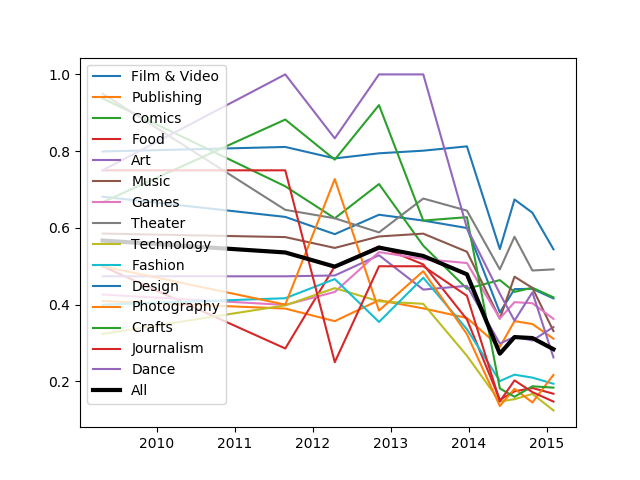

In [24]:
%matplotlib notebook

success_over_time(cleaned, 'main_category')

        

52167 Failed
44462 Success


<IPython.core.display.Javascript object>


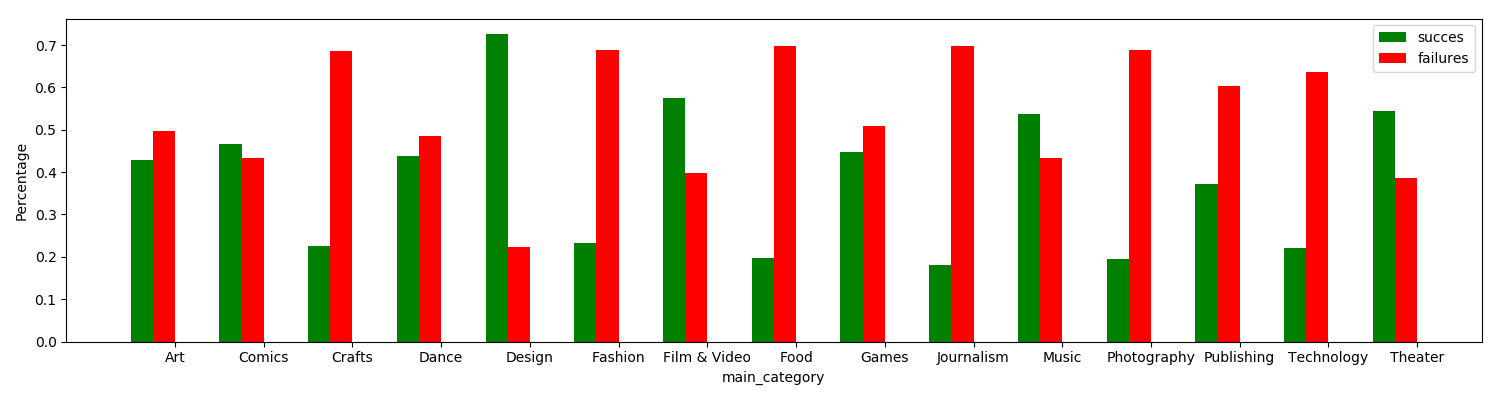

<IPython.core.display.Javascript object>


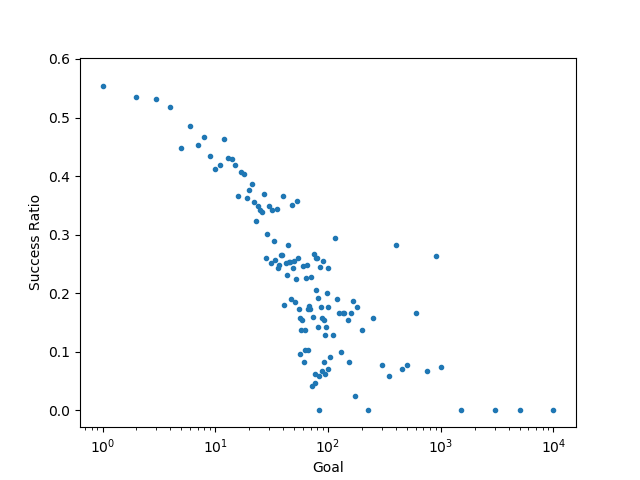

(127,)


/Users/iped/miniconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [25]:
%matplotlib notebook

summarize(cleaned)
plt.figure(figsize=(15, 4))
hist_by_group(cleaned, 'main_category')
plt.tight_layout()

plt.figure()
rolling_success(cleaned)



<IPython.core.display.Javascript object>


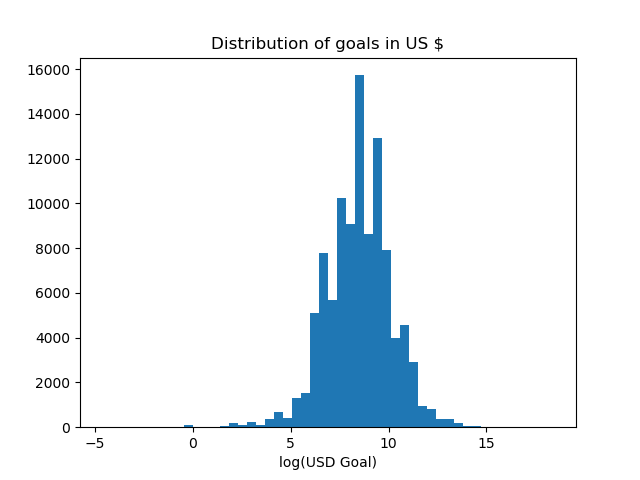

In [26]:
@cannot_crash
def show_goal_hist():
    fig, ax = plt.subplots()
    ax.hist(np.log(cleaned['goal']), 50)
    plt.show()
    plt.xlabel("log(USD Goal)")
    plt.title("Distribution of goals in US $")
    
show_goal_hist()

In [12]:
@cannot_crash
def goal_percent_comparison(successes, failures, canceled=None):
    ax = plt.subplot()
    plt.plot(successes.goal, successes.pledged/successes.goal, 'g.', alpha=.2)
    plt.plot(failures.goal, failures.pledged/failures.goal, 'r.', alpha=.2)
    if canceled is not None:
        plt.plot(canceled.goal, canceled.pledged/canceled.goal, 'y.', alpha=.2)
    ax.set_xscale('log')
    ax.set_xlabel('Goal')
    ax.set_ylabel('% Of Goal Reached')
    plt.ylim([0, 2])
    plt.legend(['successes','failures', 'canceled'])

<IPython.core.display.Javascript object>


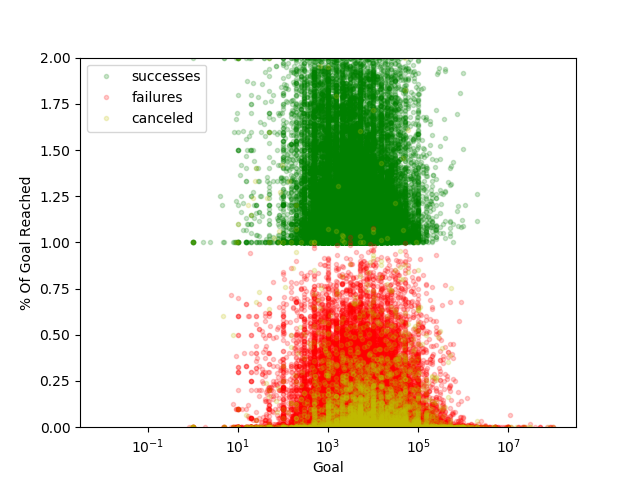

<IPython.core.display.Javascript object>


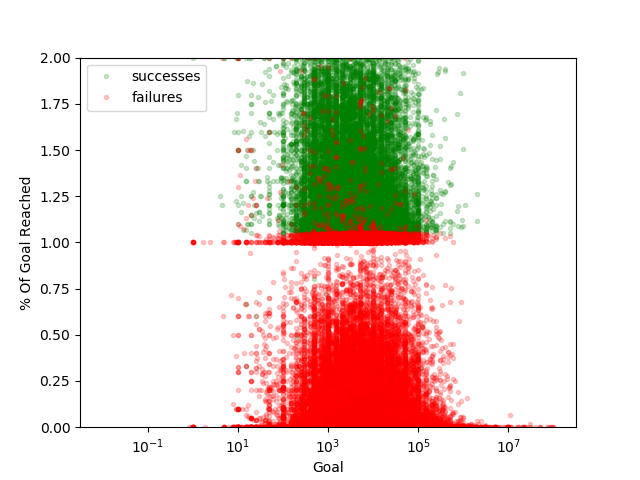

In [27]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.figure()
successes = cleaned[cleaned.state == 'successful']
failures = cleaned[cleaned.state == 'failed']
canceled = cleaned[cleaned.state == 'canceled']

goal_percent_comparison(successes,failures, canceled)

plt.figure()

successes = cleaned[cleaned.final_status == 1]
failures = cleaned[cleaned.final_status == 0]

goal_percent_comparison(successes,failures)


In [14]:
succ_fail_only = cleaned[(cleaned.state == 'failed') | (cleaned.state == 'canceled')]

In [15]:
import re
from sklearn.feature_extraction import DictVectorizer

def create_feature_matrix(df,
                          scalars=None,
                          percentiles = None,
                          categoricals=None,
                          splits=None):
    # Should be done using apply or map or something like that
    ds = []
    Y = []
    grps = {}
    
    sorted_pcts = {}
    print("Sorting necessary columns")
    if percentiles:
        for pct in percentiles:
            sorted_pcts[pct] = np.array(sorted(df[pct]))
     
    ds = []   
    
    print("Iterating over rows ",end='', flush=True)
    for i, r in df.iterrows():
        if i % 10000 == 0:
            print('.', end='', flush=True)
        d = {}
        if percentiles is not None:
            for pct in percentiles:
                d[pct] = float(np.searchsorted(sorted_pcts[pct], r[pct])) / len(sorted_pcts[pct])
        
        if scalars is not None:
            for sca in scalars:
                try:
                    d[sca] = pd.to_numeric(r[sca])
                except:
                    print(d[sca])
                    continue
                           
        if categoricals is not None:
            for cat in categoricals:
                d[cat + r[cat]] = 1
                
        if splits is not None:
            for spl in splits:
                for word in r[spl].split():
                    d[spl+'_'+word.upper()] = 1
                
        ds.append(d)
    
    v = DictVectorizer()
    print("Vectorizing")
    X = v.fit_transform(ds)
    return X.astype(float)


In [16]:
all_features = create_feature_matrix(cleaned,
    percentiles = ('goal', 'created_at', 'desc_len', 'duration'),
    categoricals = ('category', 'main_category', 'country',),
    splits = ('desc', 'name',)
)
all_features

Sorting necessary columns
Iterating over rows ...........Vectorizing


<102431x225118 sparse matrix of type '<class 'numpy.float64'>'
	with 3123890 stored elements in Compressed Sparse Row format>

In [17]:
all_features_no_date = create_feature_matrix(cleaned,
    percentiles = ('goal', 'desc_len'),
    categoricals = ('category', 'main_category', 'country',),
    splits = ('desc', 'name',)
)

Sorting necessary columns
Iterating over rows ...........Vectorizing


In [18]:
import numpy as np
import sklearn
from sklearn.svm import LinearSVC
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score

@cannot_crash
def run_classifier(X, Y, clf, n_folds=5):
    kf = KFold(n_splits=n_folds)
    
    p_corrects = []
    for train, test in kf.split(X):
        x_train = X[train]
        x_test = X[test]
        
        y_train = Y[train]
        y_test = Y[test]
        
        clf.fit(x_train, y_train)
        
        predY = clf.predict(x_test)
    
        p_corrects.append(np.count_nonzero(predY == y_test) / float(len(y_test)))
        print('\tFold accuracy: {:.3f}'.format(p_corrects[-1]))
        
    print("Mean correct across {} folds: {:.3f}".format(n_folds, np.mean(p_corrects)))

Y = (cleaned.state == 'successful').values

print("Baseline accuracy is {:.3f}".format( 1 - (float(sum(Y)) / len(Y))))

Baseline accuracy is 0.566


In [19]:
run_classifier(all_features, Y, LinearSVC())

	Fold accuracy: 0.718
	Fold accuracy: 0.728
	Fold accuracy: 0.720
	Fold accuracy: 0.721
	Fold accuracy: 0.718
Mean correct across 5 folds: 0.721


In [20]:
run_classifier(all_features_no_date, Y, LinearSVC())

	Fold accuracy: 0.716
	Fold accuracy: 0.726
	Fold accuracy: 0.718
	Fold accuracy: 0.717
	Fold accuracy: 0.716
Mean correct across 5 folds: 0.719


<IPython.core.display.Javascript object>


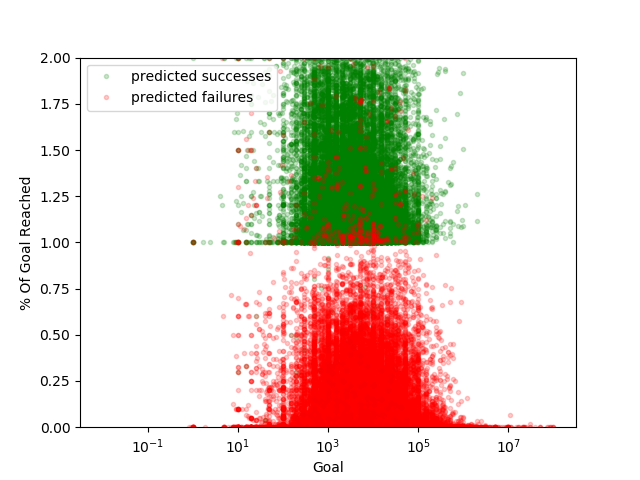

<IPython.core.display.Javascript object>


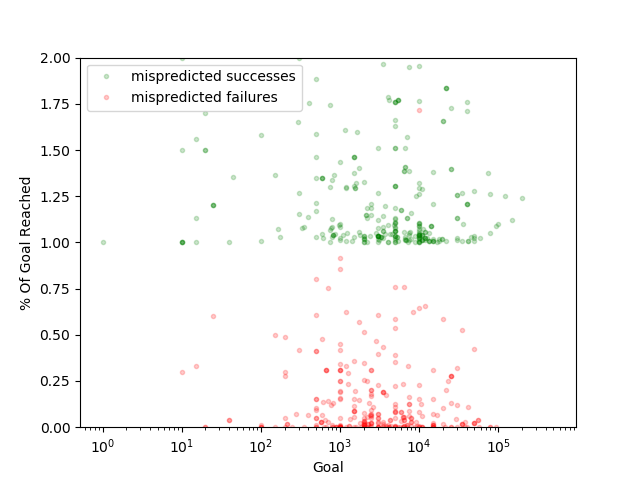

In [22]:
@cannot_crash
def predicted_goal_percent_comparison():

    clf = LinearSVC()
    clf.fit(all_features, Y)
    pred = clf.predict(all_features)

    plt.figure()

    pred_success = cleaned[pred == 1]
    pred_failures = cleaned[pred == 0]
    goal_percent_comparison(pred_success, pred_failures)
    plt.legend(['predicted successes', 'predicted failures'])

    mispred_success = cleaned[(pred == 0) & (cleaned.state == 'successful') ]
    mispred_fail = cleaned[(pred == 1) & (cleaned.state != 'successful') ]
    plt.figure()
    goal_percent_comparison(mispred_success, mispred_fail)
    plt.legend(['mispredicted successes', 'mispredicted failures'])

predicted_goal_percent_comparison()

<IPython.core.display.Javascript object>


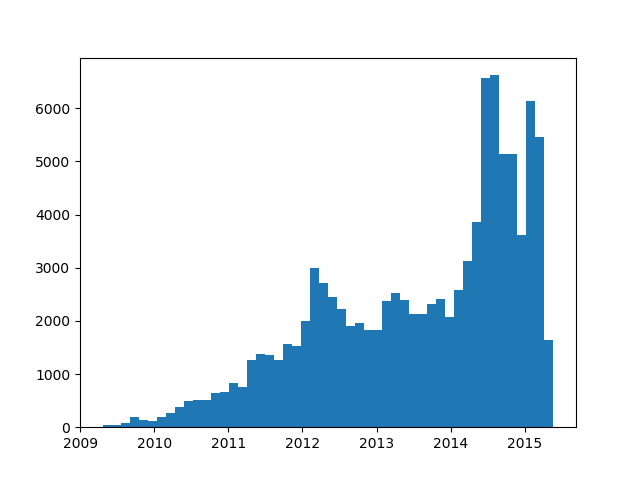

2009-04-21 17:35:35
2015-05-22 20:06:40


In [23]:
%matplotlib notebook
@cannot_crash
def show_created_at_hist():
    plt.hist(cleaned.created_at, 50)
    plt.show()
    print(cleaned.created_at.min())
    print(cleaned.created_at.max())

show_created_at_hist()